In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, chi2

In [18]:
entries_num = 10000
bins_num = 50
alpha = 0.05

In [19]:
def merge_bins(x, bins, min_entries=5):
    merged_bins = bins
    small_bins = np.where(np.histogram(x, bins=merged_bins)[0] < min_entries)[0]
    if len(small_bins) == 0:
        return merged_bins
    merged_bins = np.delete(merged_bins, small_bins[len(small_bins) - 1])
    return merge_bins(x, merged_bins)

In [20]:
def get_chi_squared_stat(observed_data, expected_frequencies, bins, vars):
    observed_frequencies = np.histogram(observed_data, bins=bins, density=True)[0]
    chi_squared_stat = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    critical_val = chi2.ppf(1-alpha, len(bins)-1-vars)
    return chi_squared_stat, critical_val

Експоненційний розподіл

In [21]:
lambda_vals = [0.1, 0.5, 1, 1.5, 2]

In [22]:
def get_random_exp_nums(lam):
    rand_nums = np.random.rand(entries_num)
    return (-1 / lam) * np.log(rand_nums)

In [23]:
def get_x_theor(x_max, lam, bins=bins_num):
    x_theor_range = np.linspace(0, x_max, bins)
    theor_pdf = np.e ** (-lam * x_theor_range) * lam
    return x_theor_range, theor_pdf

Середнє = 10.10425910829418
Дисперсія = 102.65849207137623
Статистика Х^2: 0.0816596500163308
Критичне значення Х^2: 54.572227758941736
Не відхиляємо нульову гіпотезу


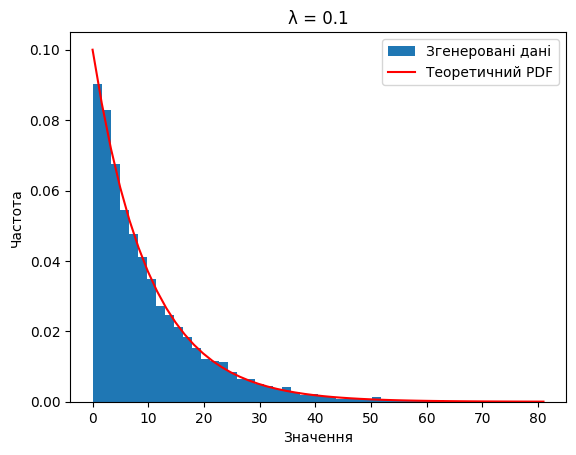

Середнє = 1.9650812333215595
Дисперсія = 3.773519439962187
Статистика Х^2: 1.9443264579743391
Критичне значення Х^2: 43.77297182574219
Не відхиляємо нульову гіпотезу


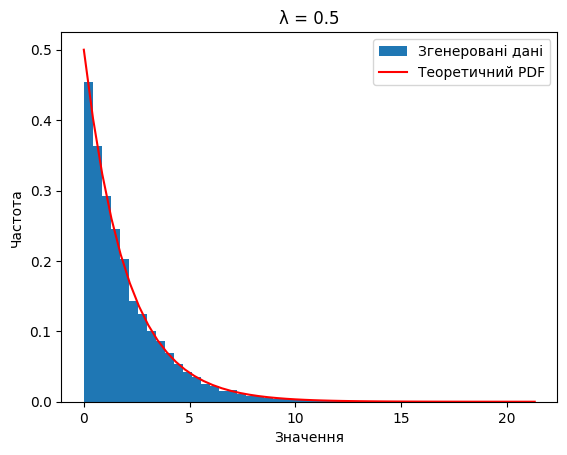

Середнє = 0.9918096269900246
Дисперсія = 0.9564175458388073
Статистика Х^2: 5.128866412210404
Критичне значення Х^2: 42.55696780429269
Не відхиляємо нульову гіпотезу


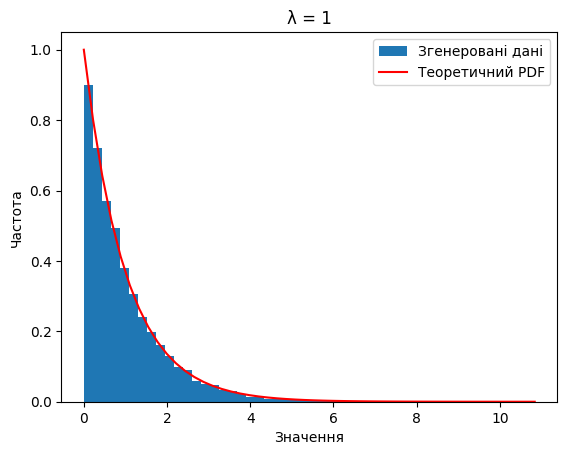

Середнє = 0.6638716770336953
Дисперсія = 0.45195053761333737
Статистика Х^2: 10.090922275031707
Критичне значення Х^2: 41.33713815142739
Не відхиляємо нульову гіпотезу


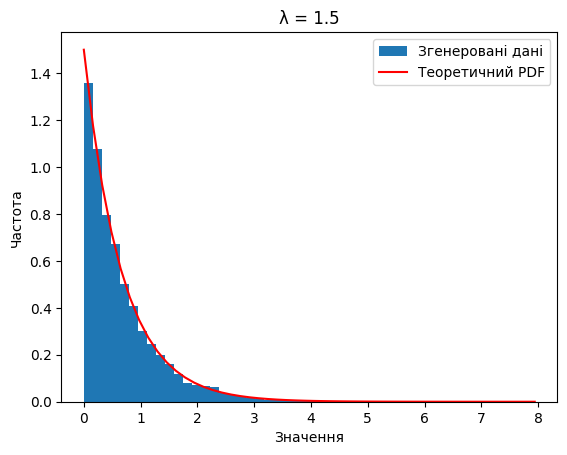

Середнє = 0.5010210259025604
Дисперсія = 0.2577247806238661
Статистика Х^2: 8.190530692471208
Критичне значення Х^2: 43.77297182574219
Не відхиляємо нульову гіпотезу


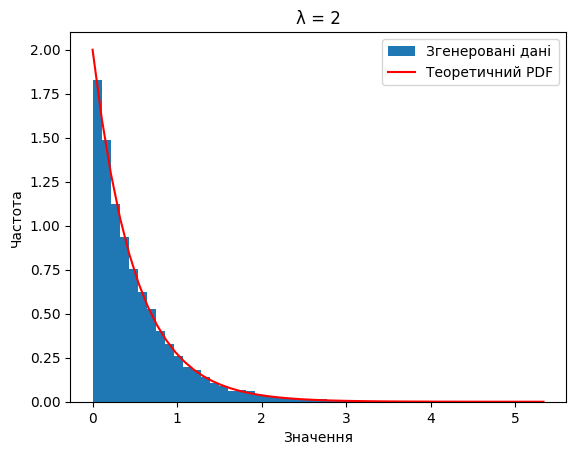

In [24]:
for lam in lambda_vals:
    x = get_random_exp_nums(lam)
    hist, bins = np.histogram(x, bins=bins_num)
    plt.hist(x, bins=bins_num, density=True, label="Згенеровані дані")

    x_max = np.max(x)
    x_theor_range, theor_pdf = get_x_theor(x_max, lam)
    plt.plot(x_theor_range, theor_pdf, "r-", label="Теоретичний PDF")

    mean = np.mean(x)
    variance = np.var(x)

    merged_bins = merge_bins(x, bins)
    updated_theor_pdf = get_x_theor(x_max, lam, bins=len(merged_bins)-1)[1]

    chi_squared_stat, critical_val = get_chi_squared_stat(x, updated_theor_pdf, merged_bins, 1)

    print(f"Середнє = {mean}")
    print(f"Дисперсія = {variance}")
    print(f"Статистика Х^2: {chi_squared_stat}")
    print(f"Критичне значення Х^2: {critical_val}")

    if critical_val < chi_squared_stat:
        print(f"Відхиляємо нульову гіпотезу")
    else:
        print(f"Не відхиляємо нульову гіпотезу")

    plt.legend()
    plt.title(f"λ = {lam}")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.show()

Нормальний розподіл

In [25]:
from scipy.stats import norm

In [26]:
a_vals = [-1, 0, 1]
sigma_vals = [0.5, 1, 4]

In [27]:
def mu():
    return np.sum(np.random.rand(12)) - 6

Середнє = -1.010756690110466
Дисперсія = 0.24702933395711535
Статистика Х^2: 5.376551514441606
Критичне значення Х^2: 55.75847927888702
Не відхиляємо нульову гіпотезу


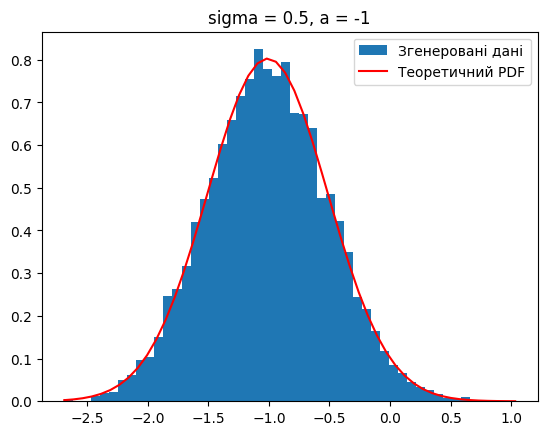

Середнє = -0.9990108297118124
Дисперсія = 1.0127154025751421
Статистика Х^2: 0.9688155403760252
Критичне значення Х^2: 56.94238714682408
Не відхиляємо нульову гіпотезу


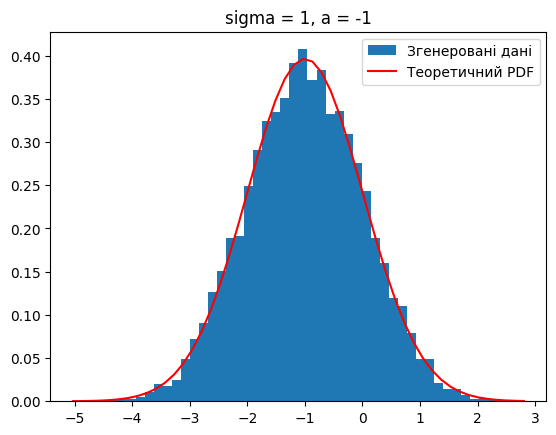

Середнє = -1.0093431637662016
Дисперсія = 16.116253724928832
Статистика Х^2: 1.0624131179966392
Критичне значення Х^2: 52.192319730102895
Не відхиляємо нульову гіпотезу


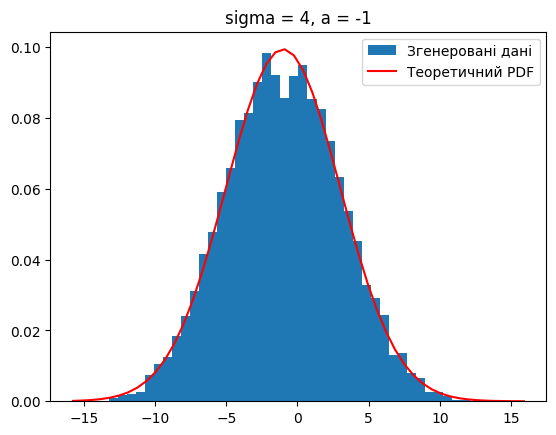

Середнє = -0.006076674707606467
Дисперсія = 0.2489256351429478
Статистика Х^2: 1.978376922632714
Критичне значення Х^2: 56.94238714682408
Не відхиляємо нульову гіпотезу


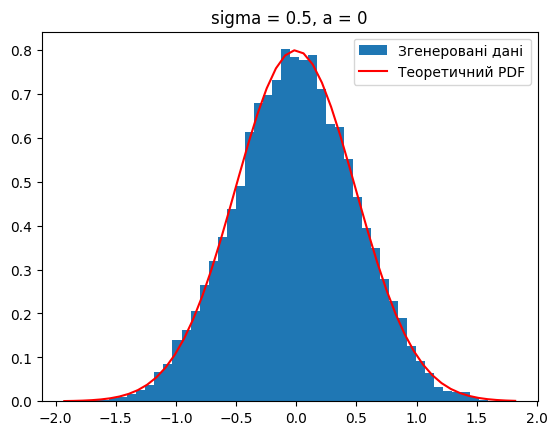

Середнє = -0.004016908368423873
Дисперсія = 1.011422256214046
Статистика Х^2: 3.041147829895924
Критичне значення Х^2: 56.94238714682408
Не відхиляємо нульову гіпотезу


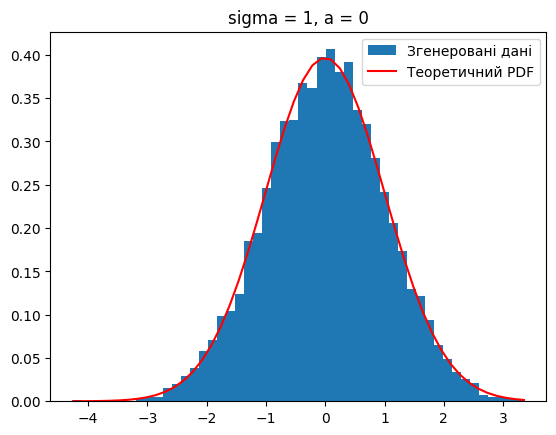

Середнє = -0.0007207802792759082
Дисперсія = 15.96529074521407
Статистика Х^2: 0.2632348166889437
Критичне значення Х^2: 59.30351202689981
Не відхиляємо нульову гіпотезу


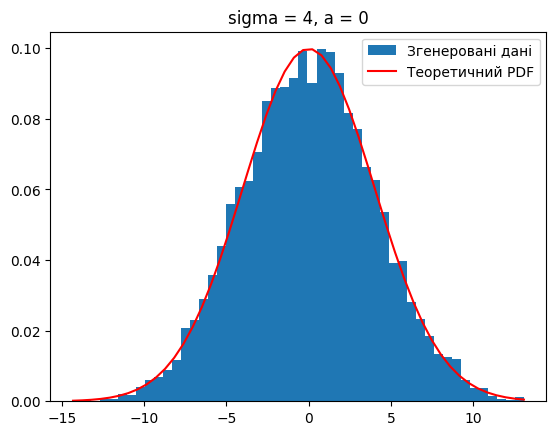

Середнє = 1.0015500052382165
Дисперсія = 0.2526798032023596
Статистика Х^2: 2.1289957764120753
Критичне значення Х^2: 56.94238714682408
Не відхиляємо нульову гіпотезу


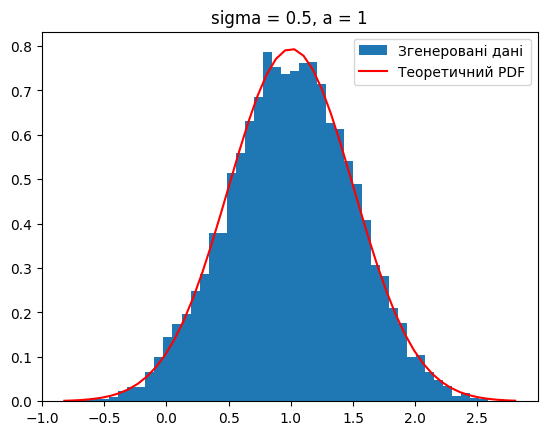

Середнє = 1.017297660592018
Дисперсія = 0.9829627630815516
Статистика Х^2: 1.6034569644431866
Критичне значення Х^2: 55.75847927888702
Не відхиляємо нульову гіпотезу


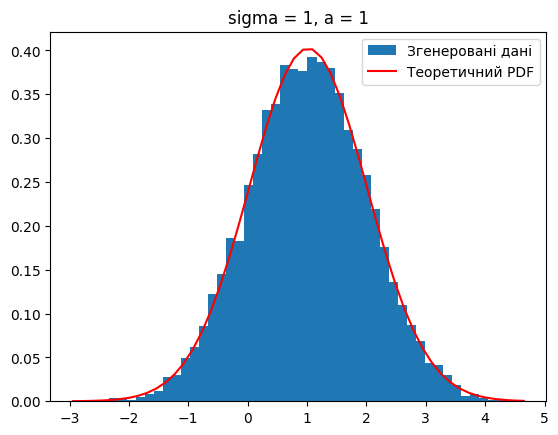

Середнє = 1.018139868940731
Дисперсія = 16.131647906968258
Статистика Х^2: 0.7335843452793499
Критичне значення Х^2: 54.572227758941736
Не відхиляємо нульову гіпотезу


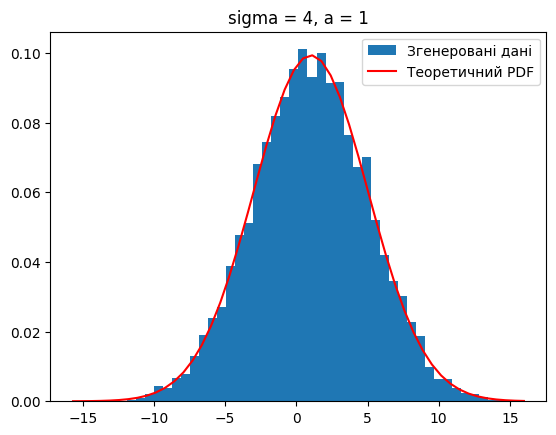

In [29]:
for a in a_vals:
    for sigma in sigma_vals:
        x = sigma * np.array([mu() for _ in range(entries_num)]) + a
        hist, bins = np.histogram(x, bins=bins_num)
        plt.hist(x, bins=bins_num, density=True, label=f"Згенеровані дані")

        mean = np.mean(x)
        variance = np.var(x)

        x_range = np.linspace(min(x), max(x), bins_num)
        theor_pdf = norm.pdf(x_range, loc=mean, scale=np.sqrt(variance))
        plt.plot(x_range, theor_pdf, 'r-', label="Теоретичний PDF")

        merged_bins = merge_bins(x, bins)

        updated_x_range = np.linspace(min(x), max(x), len(merged_bins)-1)
        updated_theor_pdf = norm.pdf(updated_x_range, loc=mean, scale=np.sqrt(variance))
        
        chi_squared_stat, critical_val = get_chi_squared_stat(x, updated_theor_pdf, merged_bins, 2)

        print(f"Середнє = {mean}")
        print(f"Дисперсія = {variance}")
        print(f"Статистика Х^2: {chi_squared_stat}")
        print(f"Критичне значення Х^2: {critical_val}")

        if critical_val < chi_squared_stat:
            print(f"Відхиляємо нульову гіпотезу")
        else:
            print(f"Не відхиляємо нульову гіпотезу")

        plt.title(f"sigma = {sigma}, a = {a}")
        plt.legend()
        plt.show()

        

Рівномірний розподіл

In [ ]:
from scipy.stats import uniform

In [35]:
a_vals = [5**13, 3**12, 4**4]
c_vals = [2**31, 2**10, 8**14]

In [ ]:
def generate_uniform(a, c):
    z = np.zeros(entries_num)
    z[0] = 1
    for i in range(1, entries_num):
        z[i] = (a * z[i-1]) % c
    return z / c

Середнє = 0.4976802491496317
Дисперсія = 0.08397034843557476
Статистика Х^2: 0.13145402339248888
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


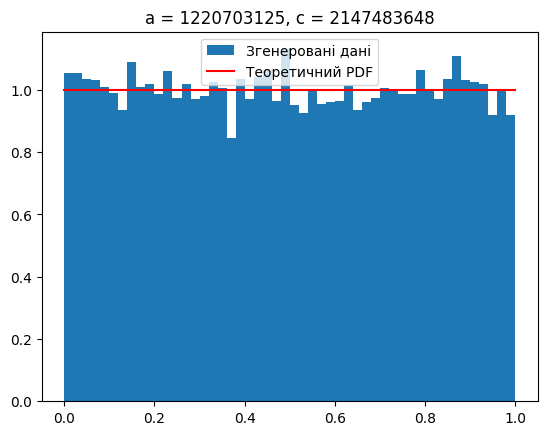

Середнє = 0.4989109375
Дисперсія = 0.08336476395507812
Статистика Х^2: 0.2037012472126105
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


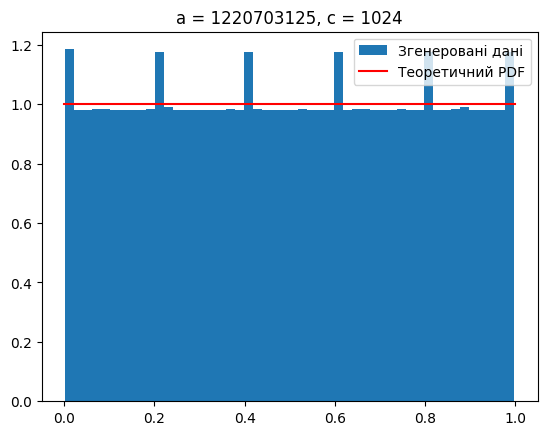

Середнє = 0.49928582761534834
Дисперсія = 0.08406586915199886
Статистика Х^2: 0.27287062871197876
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


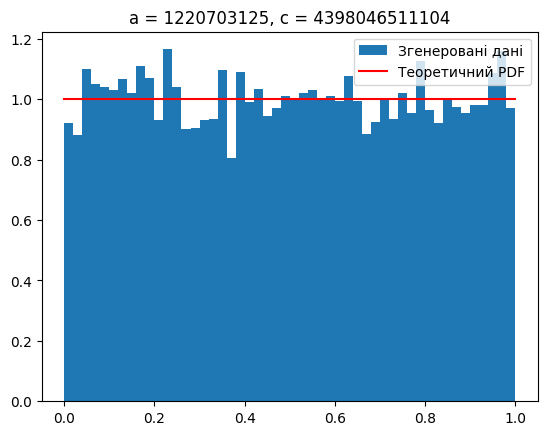

Середнє = 0.49840224275067446
Дисперсія = 0.08329316203573434
Статистика Х^2: 0.2713549709855319
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


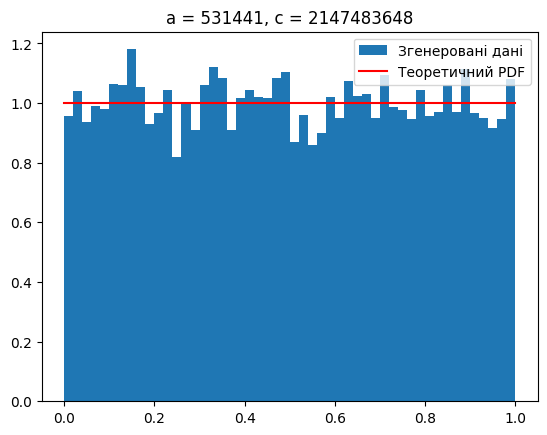

Середнє = 0.4930890625
Дисперсія = 0.08333056078125
Статистика Х^2: 6.3702212144116865
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


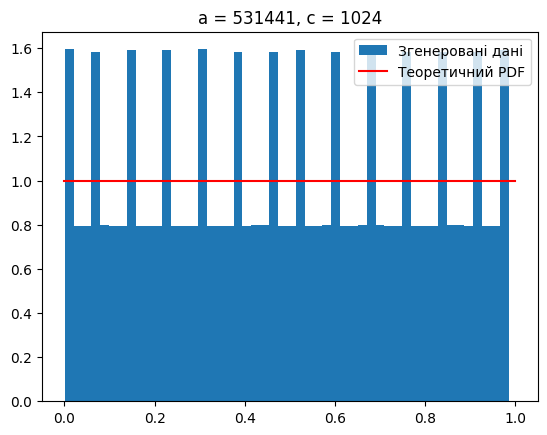

Середнє = 0.5018062748770853
Дисперсія = 0.08349560618693816
Статистика Х^2: 0.22025102027184076
Критичне значення Х^2: 65.17076890356982
Не відхиляємо нульову гіпотезу


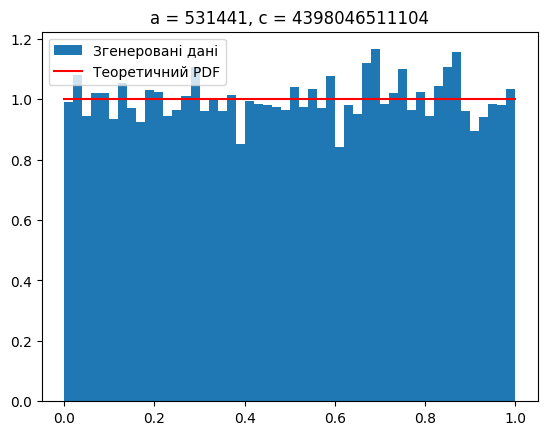

Середнє = 7.843137253075838e-07
Дисперсія = 6.102993610658867e-09
Статистика Х^2: 16129.0
Критичне значення Х^2: nan
Занадто мало проміжків


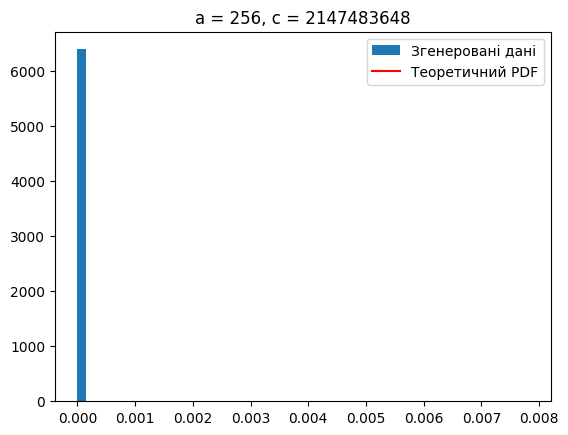

Середнє = 2.509765625e-05
Дисперсія = 6.249465475082394e-06
Статистика Х^2: 9.0
Критичне значення Х^2: nan
Занадто мало проміжків


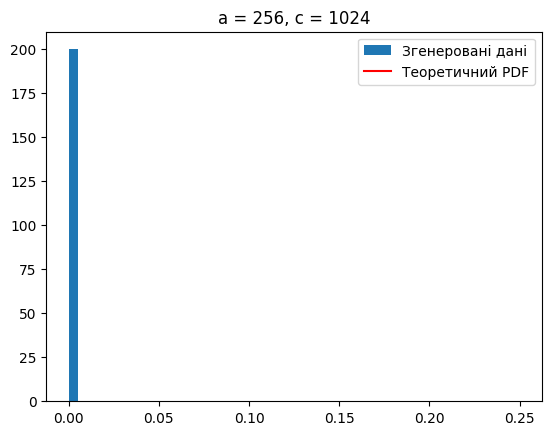

Середнє = 2.5098039215686185e-05
Дисперсія = 6.249465457314385e-06
Статистика Х^2: 9.0
Критичне значення Х^2: nan
Занадто мало проміжків


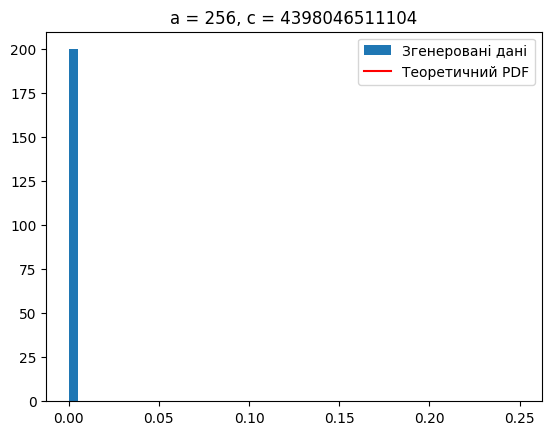

In [36]:
for a in a_vals:
    for c in c_vals:
        x = generate_uniform(a, c)
        hist, bins = np.histogram(x, bins=bins_num)
        plt.hist(x, bins=bins_num, density=True, label=f"Згенеровані дані")

        mean = np.mean(x)
        variance = np.var(x)

        merged_bins = merge_bins(x, bins)
        merged_freq = np.histogram(x, bins=merged_bins, density=True)[0]

        x_range = np.linspace(0, 1, len(merged_bins)-1)
        theor_pdf = uniform.pdf(x_range)
        plt.plot(x_range, theor_pdf, 'r-', label="Теоретичний PDF")

        chi_squared_stat, critical_val = get_chi_squared_stat(x, theor_pdf, merged_bins, 2)

        print(f"Середнє = {mean}")
        print(f"Дисперсія = {variance}")
        print(f"Статистика Х^2: {chi_squared_stat}")
        print(f"Критичне значення Х^2: {critical_val}")

        if len(merged_bins) <= 3:
            print("Занадто мало проміжків")
        else:
            if critical_val < chi_squared_stat:
                print(f"Відхиляємо нульову гіпотезу")
            else:
                print(f"Не відхиляємо нульову гіпотезу")

        plt.title(f"a = {a}, c = {c}")
        plt.legend()
        plt.show()